Deliverable 2: Scrape and Analyse Mars Weather Data

In [9]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

Step 1: Visit the Website

In [5]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

Step 2: Scrape the Table

In [10]:
# Create a Beautiful Soup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [11]:
# Extract all rows of data
rows = soup.find_all('tr', class_= 'data-row')

Step 3: Store the Data

In [12]:
# Create an empty list
mars_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    mars_list.append(row)

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [14]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


Step 4: Prepare for Data Analysis

In [15]:
# Examine data type of each column
dataframe_type = mars_df.dtypes
dataframe_type

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [19]:
# Change data types for data analysis
change_dtype = {'id': int,
               'sol': int,
               'ls': int,
                'month': int,
                'min_temp': float,
                'pressure': float
               }
mars_df = mars_df.astype(change_dtype)
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

In [20]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


Step 5: Analyse the Data

In [21]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
num_months

12

In [22]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df['sol'].nunique()
martian_days

1867

In [23]:
# 3. What is the average low temperature by month?
mars_df_groupby_month = mars_df.groupby('month').mean()
mars_df_avg_low_temp = mars_df_groupby_month['min_temp'].reset_index('month')
mars_df_avg_low_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


Text(0.5, 1.0, 'Temperature by Month')

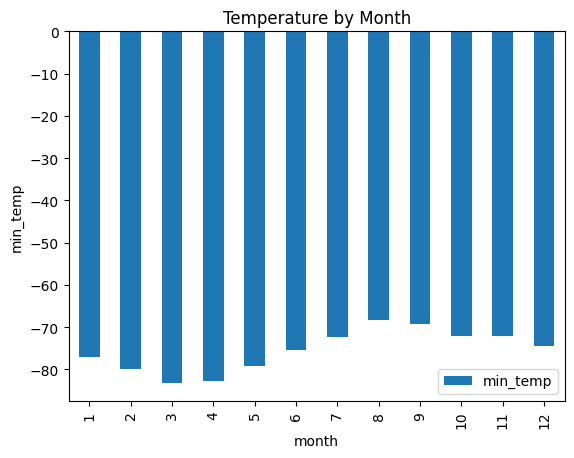

In [26]:
# Plot the average temperature by month
mars_df_avg_low_temp.plot(x='month', y='min_temp', kind = 'bar')
plt.ylabel('min_temp')
plt.title('Temperature by Month')

In [27]:
# 4. Average pressure by Martian month
pressure_by_month = mars_df.groupby('month').mean()
avg_pressure = pressure_by_month['pressure'].reset_index('month')
avg_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


Text(0.5, 1.0, 'Pressure by Month')

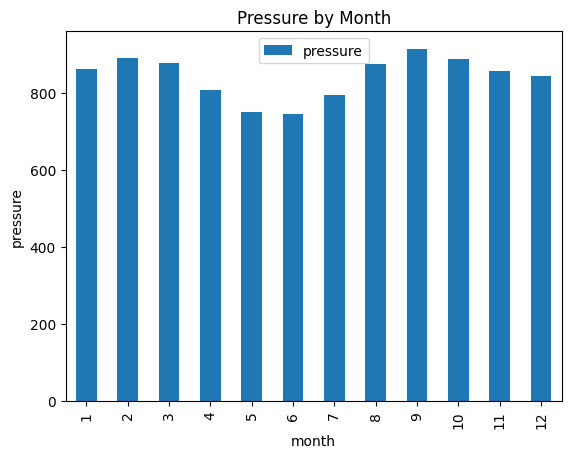

In [28]:
# Plot the average pressure by month
avg_pressure.plot(x='month', y='pressure', kind = 'bar')
plt.ylabel('pressure')
plt.title('Pressure by Month')

Step 6: Save the Data


In [29]:
# Write the data to a CSV
mars_df.to_csv('Mars.csv', encoding='utf-8')

In [30]:
browser.quit()